# Parameters

In [38]:
import numpy as np
%matplotlib widget
name = '3ev_slit_1_100s_vis'
path = "..\\QuOEPP_Results\\"+name
save_path="C:\\Users\\admin\\Desktop\\results\\"

hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97)])
offset = 0
binning = 20
range = 400
radi = 50
shift = -200
scale = 0.1615 # 60m cam length
#scale = 0.47 # 20.5m cam length

# Plot Analysis tool

20 0
Not clustered
Number of electron events: 135396392
Number of photon events: 218746
Found 12311 coincidences at 0.0 ns offset
Koordinaten: (82, 85), (169, 174)
Koordinaten: (81, 86), (168, 175)
Bereich bestätigt


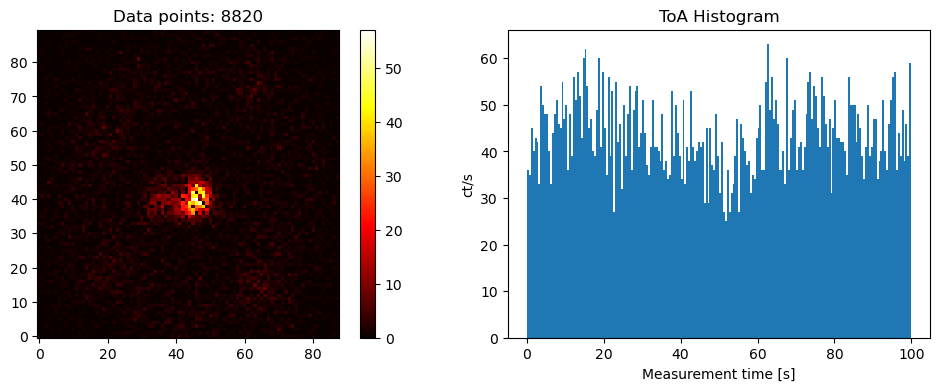

20 0
Not clustered
Number of electron events: 20416813
Number of photon events: 607278
Found 9609 coincidences at 0.0 ns offset
Koordinaten: (81, 88), (173, 179)
Koordinaten: (80, 81), (172, 172)
Bereich bestätigt


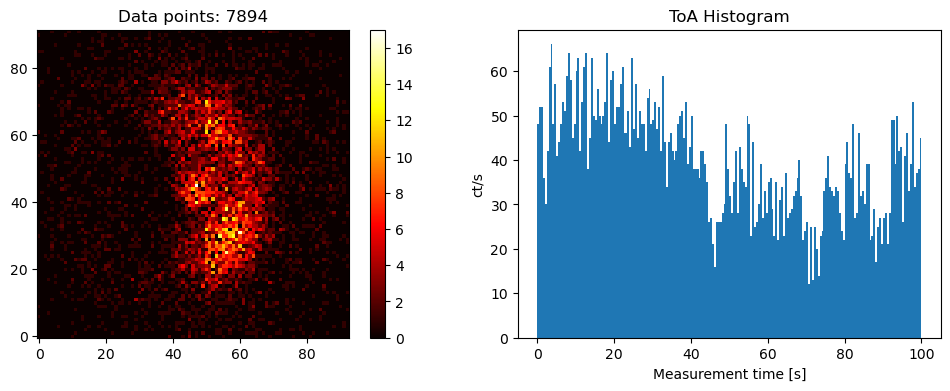

20 0
Not clustered
Number of electron events: 135396392
Number of photon events: 218746
Found 12311 coincidences at 0.0 ns offset
Koordinaten: (109, 118), (122, 133)
Bereich bestätigt


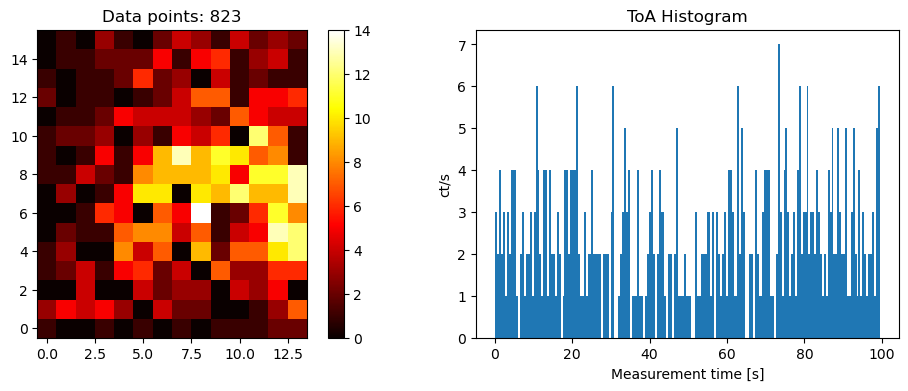

Koordinaten: (88, 162), (100, 177)
Koordinaten: (127, 144), (170, 175)
Bereich bestätigt


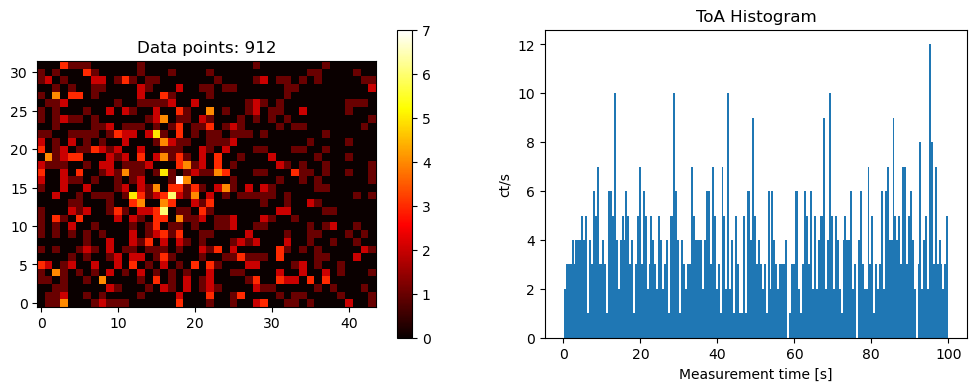

Koordinaten: (99, 111), (142, 142)
Koordinaten: (121, 119), (142, 142)
Koordinaten: (121, 119), (131, 131)
Bereich bestätigt


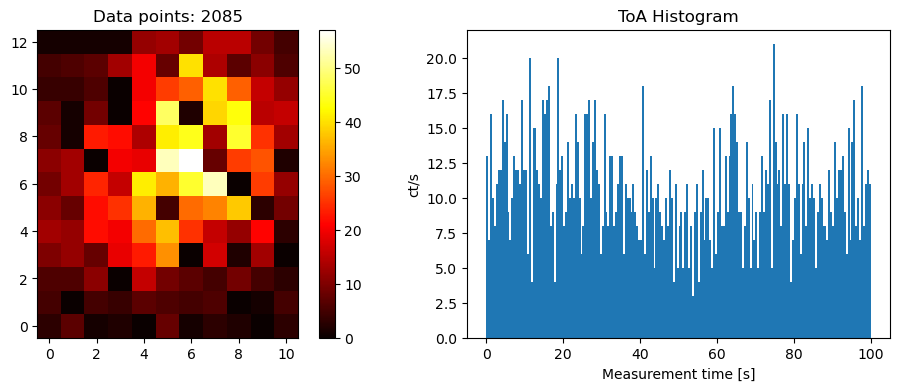

Koordinaten: (82, 174), (92, 186)


In [1]:
# Importieren Sie die benötigten Module
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from pathlib import Path
from modules import corr
from tkinter import filedialog

# Erstellen Sie ein Tkinter-Fenster
window = tk.Tk()
window.title("Bereich auswählen")

def change_directory():
    global path, data_path, name
    # Eingeben des Datenpfades
    path = filedialog.askdirectory()
    data_path = Path(path)
    name = data_path.name
    replot()

# Erstellen Sie eine Funktion, um die Koordinaten und Datenpunkte des ausgewählten Bereichs zu erhalten
def onselect(eclick, erelease):

    # eclick und erelease sind die Ereignisse an den Mausklick- und Freigabepositionen
    # Extrahieren Sie die Koordinaten des ausgewählten Bereichs
    global x1, x2, y1, y2
    x1, y1 = int(eclick.xdata), int(eclick.ydata)
    x2, y2 = int(erelease.xdata), int(erelease.ydata)

    # Drucken Sie die Koordinaten und Datenpunkte aus
    print(f"Koordinaten: ({x1}, {y1}), ({x2}, {y2})")


# Erstellen Sie eine Funktion, um den ausgewählten Bereich zu bestätigen und eine andere Funktion auszuführen
def confirm():

    # Führen Sie eine andere Funktion aus (hier nur ein Beispiel)
    print("Bereich bestätigt")

    show_image()


# Erstellen Sie eine Funktion, um den ausgewählten Bereich zurückzusetzen und einen neuen Bereich zu wählen
def replot():

    global fig, canvas, index_coin, data_bincoin, data

    try:
        canvas.get_tk_widget().destroy()
    except: pass

    print(binning_box.get(), offset_box.get())
    offset = int(offset_box.get())
    binning = int(binning_box.get())

    analysis = corr.coin(path, name)

    index_coin, data_raw, data_bincoin = analysis.coincidences(offset, binning)
    hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97)])
    data_bincoin[hot_pixels[:,1],hot_pixels[:,0]] = 0
    data=data_bincoin

    # Erstellen Sie eine neue Abbildung
    fig = plt.figure(figsize=(8,8))
    fig.clear()

    canvas = FigureCanvasTkAgg (fig, master=window)

    # Zeigen Sie das Bild mit plt.imshow an
    plt.imshow(data,origin='lower',cmap='hot')
    plt.xlim([50,200])
    plt.ylim([50,200])

    canvas.get_tk_widget ().pack ()

    # Aktivieren Sie den Rechteckauswähler mit der onselect-Funktion
    rs = RectangleSelector(fig.gca(), onselect, interactive=True)
   
    plt.close()

    window.mainloop()
    

# Erstellen Sie eine Funktion, um das Bild anzuzeigen und den Rechteckauswähler zu aktivieren
def show_image():

    # Erstellen Sie eine Matplotlib-Figur
    fig, ax = plt.subplots(1,2,figsize=(12,4))

    # Erstellen Sie eine Leinwand, um die Figur im Fenster anzuzeigen
    canvas = FigureCanvasTkAgg (fig, window)
    data_matrix = np.load(data_path / "out_xy.npy")
    data_toa = np.load(data_path / "out_toa.npy")/10**13

    # Creating matrix list
    xrange = np.arange(x1,x2+1)
    yrange = np.arange(y1,y2+1)
    matrix_list = np.array([i*256 + j for i in xrange for j in yrange])
    coin = index_coin[np.isin(data_matrix[index_coin],matrix_list)]
    selected_data = data[y1:y2+1, x1:x2+1]

    # Plotten der daten im ausgewählten Bereich
    ax[0].set_title('Data points: {}'.format(np.sum(selected_data)))
    im = ax[0].imshow(selected_data,cmap='hot',origin='lower')
    fig.colorbar(im)

    ax[1].set_title('ToA Histogram')
    ax[1].set_xlabel('Measurement time [s]')
    ax[1].set_ylabel('ct/s')
    ax[1].hist(data_toa[coin],bins=200)

    plt.show()

# Datei ändern
dir_button = tk.Button(window, text="Datensatz ändern", command=change_directory)
dir_button.pack()

# Erstellen von Textboxen
binning_box = tk.Entry(window)
binning_box.insert(0,"20")
label1 = tk.Label(window, text="Binning")
label1.pack()
binning_box.pack()

offset_box = tk.Entry(window)
offset_box.insert(0,"0")
label2 = tk.Label(window, text="Offset")
label2.pack()
offset_box.pack()

# Erstellen Sie einen Button, um den ausgewählten Bereich zurückzusetzen
reset_button = tk.Button(window, text="Replot", command=replot)
reset_button.pack()

# Erstellen Sie einen Button, um den ausgewählten Bereich zu bestätigen
confirm_button = tk.Button(window, text="Bereich bestätigen", command=confirm)
confirm_button.pack()

window.mainloop()

# Histogram

In [2]:
import numpy as np
name="300s_open_1-4eV_60m_masked"
dataset = 'C:\\Users\\admin\\Desktop\\Dateninsel\\2023 09 27 - CL Window correlation measurements\\'+name+'\\'
path=dataset
#parameters=np.load(dataset + "parameters.npy",allow_pickle='TRUE').item()
parameters=np.load("pre.npy",allow_pickle='TRUE').item()

## for single measurements

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from modules import corr
# dataset+='1\\'

analysis = corr.coin(dataset, name)

hist = np.load(dataset+'out_hist.npy')
edges = np.load(dataset+'out_edges.npy')
coi = np.load(dataset+'out_coincount.npy')
raw = np.load(dataset+'out_rawcount.npy')
#print(hist, edges)

profile, xscale = analysis.circular_profile_coin(raw, coi, 50, parameters)

fig, ax = plt.subplots(3,1,figsize=(6,10))

ax[0].plot(edges[:-1],hist)
ax[0].grid(True)


hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97)])
coi[hot_pixels[:,1],hot_pixels[:,0]] = 0
ax[1].imshow(coi,cmap='hot', origin='lower')

ax[2].plot(profile[1:-1],label=name+'_raw')
ax[2].grid(True)
scale = 0.1615

ax[2].set_xticks(np.round(xscale, 3),np.round(xscale*scale, 3))
ax[2].set_yscale("log")
ax[2].set_xlabel("Radius [urad]")
ax[2].set_ylabel("Counts")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\admin\\Desktop\\Dateninsel\\2023 09 25 - Correlation measurements\\300s_open_2-4eV_61m_masked_uv\\1\\out_hist.npy'

## for long acquisition times

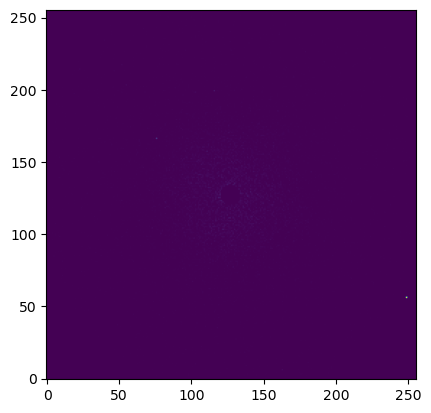

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from modules import corr

analysis = corr.coin(dataset, name)

hist = np.load(dataset+'sum_hist.npy')
edges = np.load(dataset+'sum_edges.npy')
coi = np.load(dataset+'sum_coin.npy')
raw = np.load(dataset+'sum_raw.npy')

hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97),(249,56)])
coi[hot_pixels[:,1],hot_pixels[:,0]] = 0

plt.figure()
plt.imshow(coi, origin='lower')

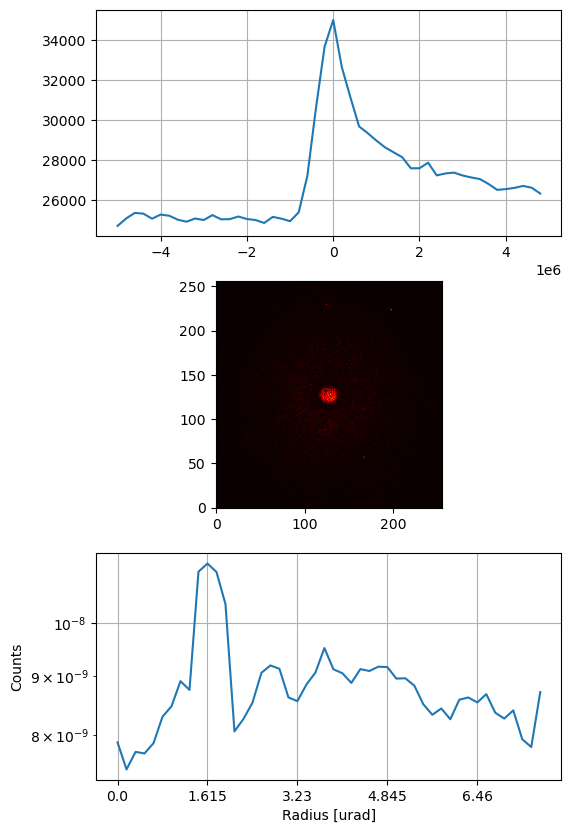

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from modules import corr

analysis = corr.coin(dataset, name)

hist = np.load(dataset+'sum_hist.npy')
edges = np.load(dataset+'sum_edges.npy')
coi = np.load(dataset+'sum_coin.npy')
raw = np.load(dataset+'sum_raw.npy')
#print(hist, edges)

profile, xscale = analysis.circular_profile_coin(raw, coi, 50, parameters)

fig, ax = plt.subplots(3,1,figsize=(6,10))

ax[0].plot(edges[:-1],hist)
ax[0].grid(True)


hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97),(249,56)])
coi[hot_pixels[:,1],hot_pixels[:,0]] = 0
ax[1].imshow(coi,cmap='hot', origin='lower')

ax[2].plot(profile[1:-1],label=name+'_raw')
ax[2].grid(True)
scale = 0.1615

ax[2].set_xticks(np.round(xscale, 3),np.round(xscale*scale, 3))
ax[2].set_yscale("log")
ax[2].set_xlabel("Radius [urad]")
ax[2].set_ylabel("Counts")

plt.show()


In [12]:
import numpy as np
from modules import corr
import matplotlib.pyplot as plt
# name='100s_2eV_slit_2eV_81m'
# path = 'C:\\Users\\timepix\\Desktop\\Dateninsel\\2023 09 25 - Correlation measurements\\'+name

parameters = np.load('pre.npy', allow_pickle=True).item()

show = True
save = True

range = 400
binning = 20

data = corr.coin(path, name)
offset, hist, edge, fwhm = data.histogram(parameters, 0, range, int(range*2/binning), 1000)
_, hist, edge, fwhm = data.histogram(parameters, offset, range, int(range*2/binning), 1000)

fig, ax = plt.subplots()
ax.plot(edge[:-1]/1e7, hist, drawstyle= 'steps-pre')
ax.set_xlabel(r'$\Delta t \;/ \mathrm{\mu s}$')
ax.set_ylabel('ct/s')

#fig.savefig(save_path+name+'_hist.png',dpi=600)


MemoryError: Allocation failed (probably too large).

# Delay Histogram

Not clustered
Number of electron events: 9963523
Number of photon events: 1141650
Found 4424 coincidences at -80.0 ns offset
[0.0000e+00 1.0000e+04 2.0000e+04 ... 9.9994e+08 9.9995e+08 9.9996e+08]
[3.37734375e+04 4.65310953e+07 5.18620781e+07 6.44672656e+07
 7.99668859e+07 1.11542900e+08 1.50056794e+08 2.37581439e+08
 2.47126108e+08 2.68333858e+08 2.70934492e+08 2.91929611e+08
 3.03033792e+08 3.15463650e+08 3.26603850e+08 3.30249948e+08
 3.35729873e+08 3.49033552e+08 3.73887195e+08 3.93810488e+08
 4.43231959e+08 5.14520411e+08 5.20827264e+08 5.33897172e+08
 5.76361461e+08 6.24357786e+08 6.42527047e+08 6.87055364e+08
 7.06991012e+08 7.11791495e+08 7.28255369e+08 7.37148194e+08
 7.85317031e+08 8.00455039e+08 8.57388120e+08 8.58657073e+08
 8.71164627e+08 8.80104455e+08 8.96306723e+08 8.96666598e+08
 9.03826588e+08 9.07508762e+08 9.45105608e+08 9.75213675e+08]


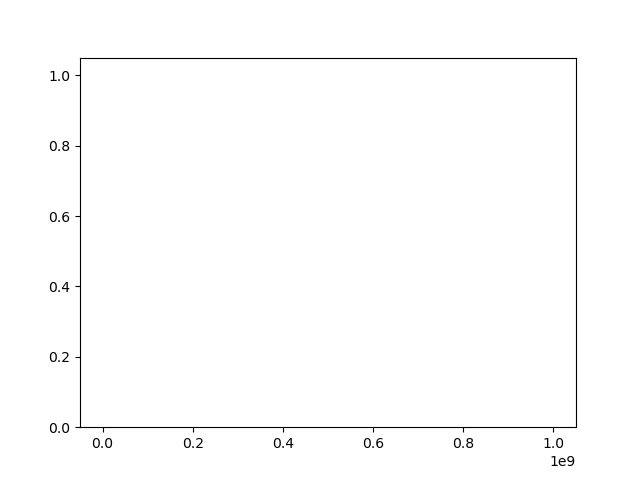

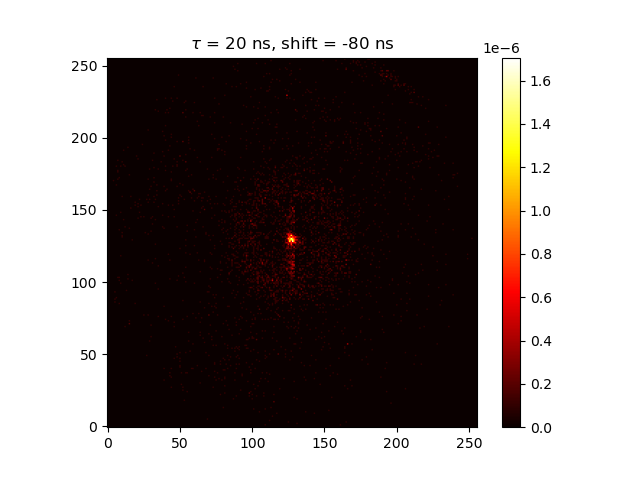

In [3]:
import numpy as np
from modules import corr
import matplotlib.pyplot as plt

%matplotlib widget
name = '100s_3eV_slit_1eV_vis'
path = "C:\\Users\\domin\\OneDrive - TU Wien\\Proj Arbeit 1\\data\\datasets\\"+name
save_path="C:\\Users\\admin\\Desktop\\results\\"

hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97)])
roi = np.array([])
offset = 0
binning = 20
range = 400
radi = 50
shift = -80
scale = 0.1615 # 60m cam length
#scale = 0.47 # 20.5m cam length

parameters = np.load(path + '\\parameters.npy', allow_pickle=True).item()

show = False
save = False


offset += int(shift*1e4)

data = corr.coin(path, name)
data.coincidences(offset,binning)
data_toa = np.load(path + '\\out_toa.npy')/10**4
cut_toa=data_toa[data_toa < 10**9]
bins = np.arange(0,cut_toa[-1],10000)
print(bins)
coin = np.load(path + '\\out_coin.npy')

toa_hist = data_toa[coin]
toa_hist=toa_hist[toa_hist<10**9]
print(toa_hist)
plt.hist(toa_hist, bins=bins)

pic1, pic2, ecounts, coincounts = data.plot(binning,offset,0.0001,'hot',0.001)

pic2[hot_pixels[:,1],hot_pixels[:,0]] = 0

fig, ax = plt.subplots()
ax.grid(False)
ax.set_title(r'$\tau$ = {} ns, shift = {} ns'.format(binning, shift))
im = ax.imshow(pic2, cmap='hot')
ax.invert_yaxis()
fig.colorbar(im)
#fig.savefig(save_path+name+'_coin_{}.png'.format(shift),dpi=600)

# Raw Plot

Not clustered
Number of electron events: 9963523
Number of photon events: 1141650
Found 5940 coincidences at -20.0 ns offset


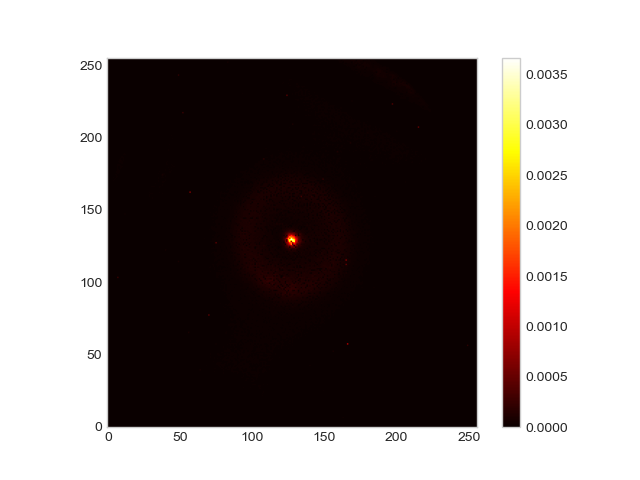

In [12]:
import numpy as np
from modules import corr
import matplotlib.pyplot as plt

parameters = np.load(path + '\\parameters.npy', allow_pickle=True).item()

show = False
save = False

data = corr.coin(path, name)
data.coincidences(offset,binning)

pic1, pic2, ecounts, coincounts = data.plot(binning,offset,0.0001,'hot',0.001)

pic1[hot_pixels[:,1],hot_pixels[:,0]] = 0
pic2[hot_pixels[:,1],hot_pixels[:,0]] = 0

fig, ax = plt.subplots()
ax.grid(False)
im = ax.imshow(pic1, cmap='hot', vmax = 0.002)
ax.invert_yaxis()
fig.colorbar(im)
ax.set_title('{} electrons'.format(ecounts))
fig.savefig(save_path+name+'_raw.png',dpi=600)

# Coincidence Plot

Not clustered
Number of electron events: 9963523
Number of photon events: 1141650
Found 4174 coincidences at -100.0 ns offset


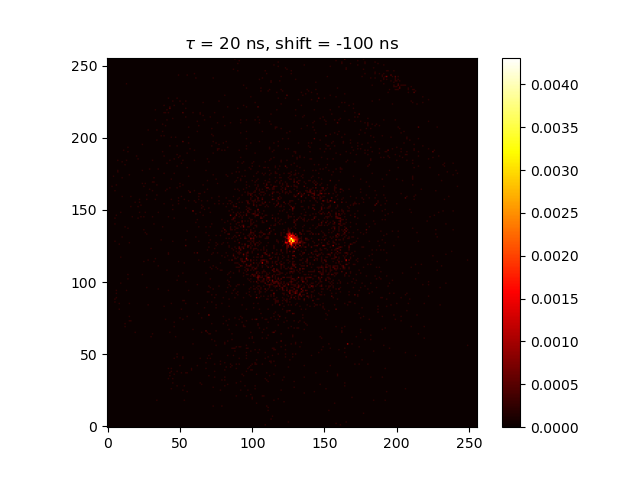

In [63]:
import numpy as np
from modules import corr
import matplotlib.pyplot as plt

%matplotlib widget
name = '3ev_slit_1_100s_vis'
path = "..\\QuOEPP_Results\\"+name
save_path="C:\\Users\\admin\\Desktop\\results\\"

hot_pixels = np.array([(116,199),(103,198),(76,166),(55,203),(121,97)])
offset = 0
binning = 20
range = 400
radi = 50
shift = -100
scale = 0.1615 # 60m cam length
#scale = 0.47 # 20.5m cam length

parameters = np.load(path + '\\parameters.npy', allow_pickle=True).item()

show = False
save = False


offset += int(shift*1e4)

data = corr.coin(path, name)
data.coincidences(offset,binning)

pic1, pic2, ecounts, coincounts = data.plot(binning,offset,0.0001,'hot',0.001)

pic2[hot_pixels[:,1],hot_pixels[:,0]] = 0

fig, ax = plt.subplots()
ax.grid(False)
ax.set_title(r'$\tau$ = {} ns, shift = {} ns'.format(binning, shift))
im = ax.imshow(pic2, cmap='hot')
ax.invert_yaxis()
fig.colorbar(im)
fig.savefig(save_path+name+'_coin_{}.png'.format(shift),dpi=600)

# Diff Plot

Not clustered
Number of electron events: 9963523
Number of photon events: 1141650
Found 5940 coincidences at -20.0 ns offset


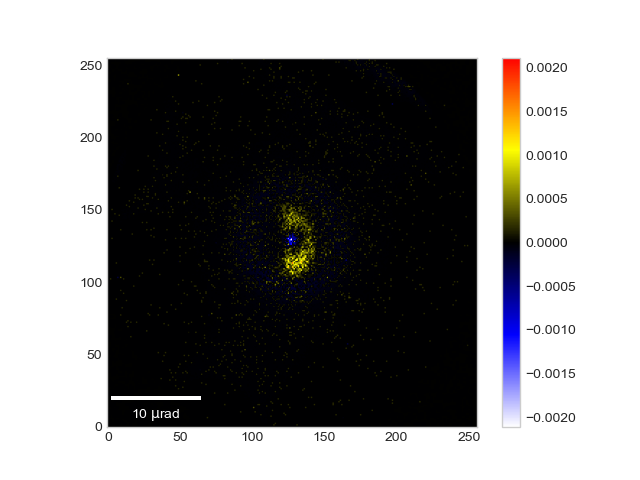

In [18]:
import numpy as np
import corr
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import SymLogNorm, LogNorm
from matplotlib_scalebar.scalebar import ScaleBar

parameters = np.load(path + '\\parameters.npy', allow_pickle=True).item()

show = False
save = False

data = corr.coin(path, name)
data.coincidences(offset,binning)
pic1, pic2, ecounts, coincounts = data.plot(binning,offset,0.0001,'hot',0.001)

pic1[hot_pixels[:,1],hot_pixels[:,0]] = 0
pic2[hot_pixels[:,1],hot_pixels[:,0]] = 0

symlognorm = SymLogNorm(linthresh=0.0001, linscale=0.0001, vmin=-0.01, vmax=0.01)
map = LinearSegmentedColormap.from_list('coin_map', [(1,1,1),(0,0,1),(0,0,0),(1,1,0),(1,0,0)], N=500)
scalebar = ScaleBar(scale,units="um",dimension='si-length',length_fraction=0.25,location="lower left",box_alpha=0.0, scale_formatter=lambda value, unit: f"{value} {unit[:-1]}rad",color='#FFFFFF')

fig, ax = plt.subplots()
ax.grid(False)
im = ax.imshow(pic2-pic1, cmap=map, vmin=-np.max(pic2-pic1), vmax=np.max(pic2-pic1))
ax.invert_yaxis()
ax.add_artist(scalebar)
fig.colorbar(im)
fig.savefig(save_path+name+'_diff.png',dpi=600)

# Circular Profile raw

Not clustered
Number of electron events: 9963523
Number of photon events: 1141650
Found 5940 coincidences at -20.0 ns offset


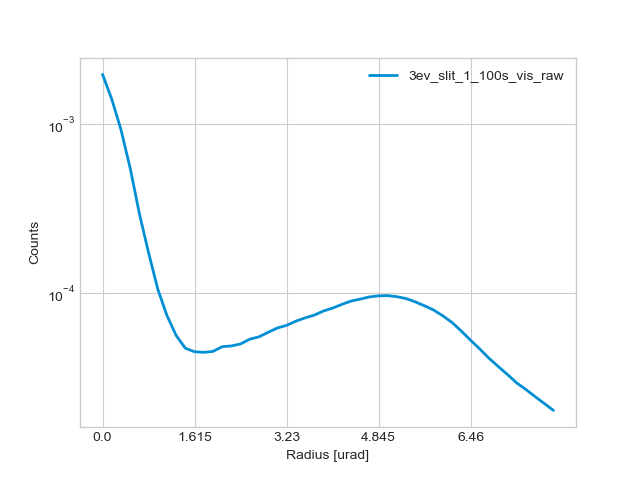

No such comm: eec90f9c0c9f4a19b95464e9c13063cb


In [15]:
import numpy as np
from modules import corr
import matplotlib.pyplot as plt

parameters = np.load(path + '\\parameters.npy', allow_pickle=True).item()

show = False
save = False
radi = 50

data = corr.coin(path, name)
data.coincidences(offset,binning)

raw_profile, xscale = data.circular_profile_raw(pic1, pic2, np.array([128, 128]),50,parameters)

plt.plot(raw_profile,label=name+'_raw')
plt.grid(True)

plt.xticks(np.round(xscale, 3),np.round(xscale*scale, 3))
plt.yscale("log")
plt.xlabel("Radius [urad]")
plt.ylabel("Counts")
plt.legend()

plt.savefig(save_path+name+'_radial_raw.png',dpi=600)

# Circular Profile Coin

No such comm: 7f2759c093e24865b106f44edfdcc6bd


Not clustered
Number of electron events: 9963523
Number of photon events: 1141650
Found 5940 coincidences at -20.0 ns offset


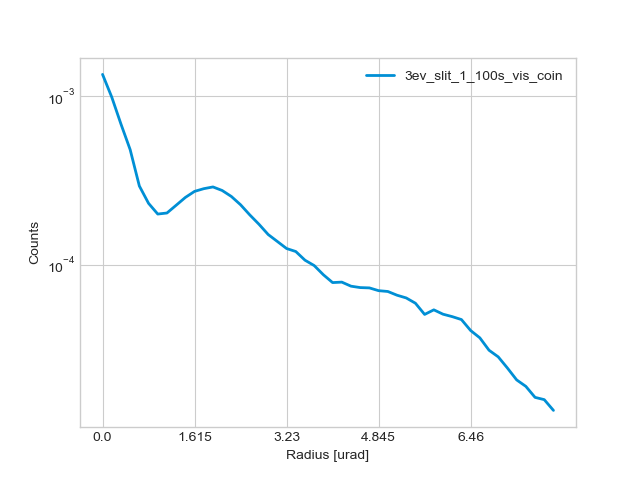

In [16]:
import numpy as np
import corr
import matplotlib.pyplot as plt

parameters = np.load(path + '\\parameters.npy', allow_pickle=True).item()

show = False
save = False
radi = 50

data = corr.coin(path, name)
data.coincidences(offset,binning)

coin_profile, xscale = data.circular_profile_coin(pic1, pic2, np.array([128, 128]),radi,parameters)

plt.plot(coin_profile,label=name+'_coin')
plt.grid(True)

plt.xticks(np.round(xscale, 3),np.round(xscale*scale, 3))
plt.yscale("log")
plt.xlabel("Radius [urad]")
plt.ylabel("Counts")
plt.legend()

plt.savefig(save_path+name+'_radial_coin.png',dpi=600)